In [19]:
import json
import os
import shutil
import time
from base64 import b64decode
from io import BytesIO
from IPython import get_ipython
from IPython.core.magic import register_cell_magic

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import PIL
import seaborn as sns
#%config InlineBackend.figure_format = 'svg'  

@register_cell_magic
def capture_png(line, cell):
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )


    out_paths = line.strip().split(' ')
    for output in result.outputs:
        display(output)
        
        data = output.data
        if 'image/png' in data:
            path = out_paths.pop(0)
            path = path.split(".png")[0] + str(time.time_ns()) + ".png"
            if not path:
                raise ValueError('Too few paths given!')
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')
            
        code =cell

        with open("imgs/array_gallery.json", "r") as jsonFile:
            data = json.load(jsonFile)

        data[path[5:]] = code

        with open("imgs/array_gallery.json", "w") as jsonFile:
            json.dump(data, jsonFile, indent=2)




    
def disp(x, sep='.0f', annot=False,  figsize=(5,5)): 
    plt.figure(figsize =figsize)
    plt.axis("off")
    sns.heatmap(x,annot=annot,fmt=sep, cmap="YlGnBu", cbar=False); # Change range with: vmin=0, vmax=1
        
temp_path = Path.cwd() / "temp_images"
temp_path.mkdir(parents=False, exist_ok=True)

# 2D Arrays

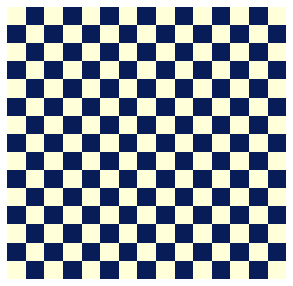

In [20]:
%%capture_png imgs/example.png
#Checkboard
pixX= 15
pixY= 15
array = [[(i+j)%2 for i in range(pixX)] for j in range(pixY)]
disp(array)

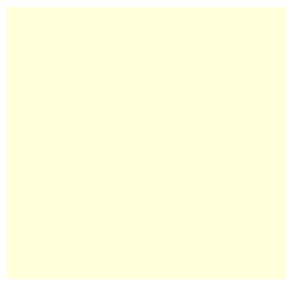

In [21]:
%%capture_png imgs/example.png
array=np.full((10,10),10)
disp(array)

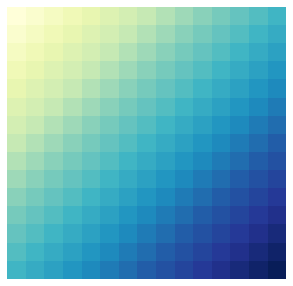

In [22]:
%%capture_png imgs/example.png
#Linear diagonal
array = [[i+j for i in range(pixX)] for j in range(pixY)]
disp(array)

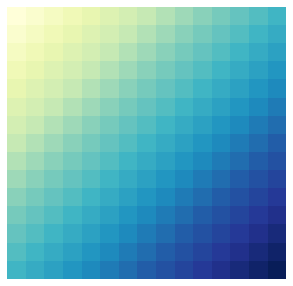

In [23]:
%%capture_png imgs/example.png
# alternative with numpy
array=np.fromfunction(lambda i, j: i + j, shape=(15, 15))
disp(array)

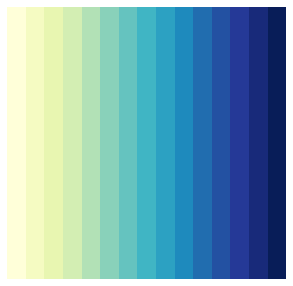

In [24]:
%%capture_png imgs/example.png
#Linear in axis1 direction
array= [[i for i in range(pixX)] for j in range(pixY)]
disp(array)

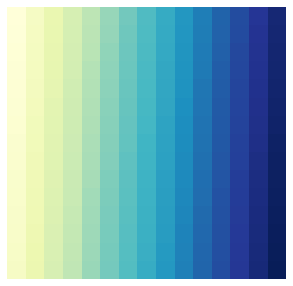

In [25]:
%%capture_png imgs/example.png
#Linear counter hori
array= [[i*pixY+j for i in range(pixX)] for j in range(pixY)]
disp(array)

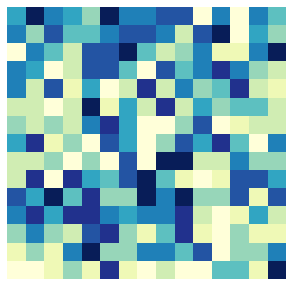

In [26]:
%%capture_png imgs/example.png
#Random
array = np.random.randint(0, 10, size=(15, 15))
disp(array)

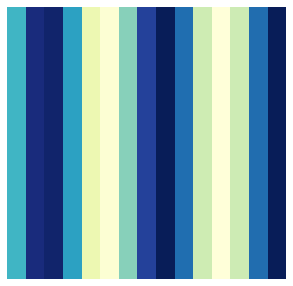

In [27]:
%%capture_png imgs/example.png
# sinudial fromfunction
array=np.fromfunction(lambda i, j: np.sin(j), (15, 15))
disp(array, sep= ".1f")

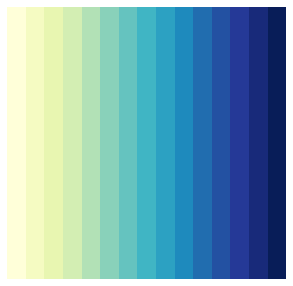

In [28]:
%%capture_png imgs/example.png
x = np.linspace(0, 15, 15)
y = np.linspace(0, 15, 15)
xx, yy = np.meshgrid(x, y, sparse=False)
disp(xx)

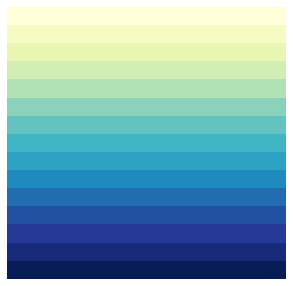

In [29]:
%%capture_png imgs/example.png
x = np.linspace(0, 15, 15)
y = np.linspace(0, 15, 15)
xx, yy = np.meshgrid(x, y, sparse=False)
disp(yy)

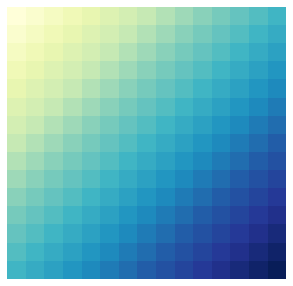

In [30]:
%%capture_png imgs/example.png
x = np.linspace(0, 15, 15)
y = np.linspace(0, 15, 15)
xx, yy = np.meshgrid(x,y, sparse= False)
array = xx+yy
disp(array)

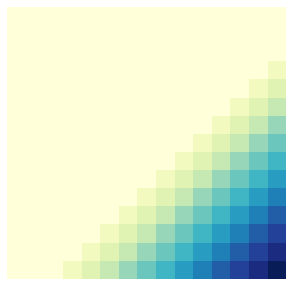

In [31]:
%%capture_png imgs/example.png
x= np.arange(-pixX//2,pixX//2)
y= np.arange(-pixY//2,pixY//2)
xx, yy = np.meshgrid(x,y, sparse= False)
array = xx+yy
array[ array <= 0 ] = 0
disp(array)

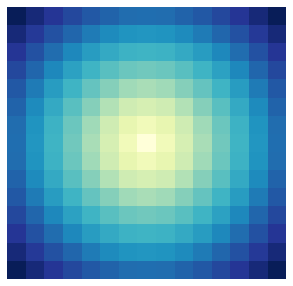

In [32]:
%%capture_png imgs/example.png
#Linear increase from center in all directions
pixX,pixY=(15,15)
x, y = np.meshgrid(np.linspace(-1,1,pixX), np.linspace(-1,1,pixY),sparse=False)
array = np.sqrt(x**2+y**2)
disp(array, sep='.1f' )

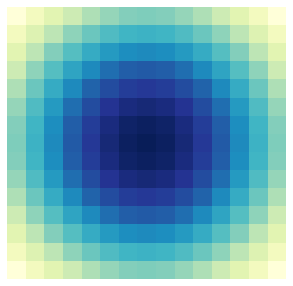

In [33]:
%%capture_png imgs/example.png
#Gaussian
pixX,pixY=(15,15)
x, y = np.meshgrid(np.linspace(-1,1,pixX), np.linspace(-1,1,pixY))
d = np.sqrt(x**2+y**2)
sigma, mu = 1.0, 0.0
array = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
disp(array, sep='.1f' )

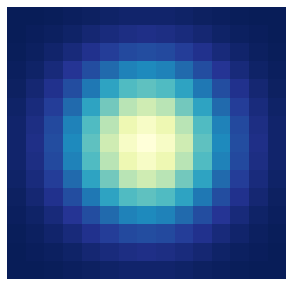

In [34]:
%%capture_png imgs/example.png
# One Minus Gaussian and smaller sigma
pixX,pixY=(15,15)
x, y = np.meshgrid(np.linspace(-1,1,pixX), np.linspace(-1,1,pixY))
d = np.sqrt(x**2+y**2)
sigma, mu = 0.4, 0.0
array = 1-np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
disp(array, sep='.1f' )

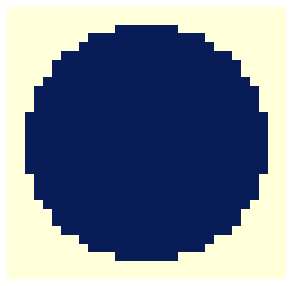

In [35]:
%%capture_png imgs/example.png
x, y = np.indices((31, 31))
dx=15
dy=15
radius=13.5
circ = (x-dx)**2 + (y-dy)**2 <= radius**2
array = np.zeros(x.shape)
array[circ]=1
disp(array)

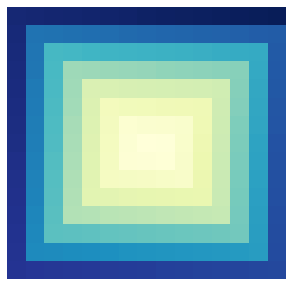

In [36]:
%%capture_png imgs/example.png
# spiral  # code inspired from : https://stackoverflow.com/questions/36834505/creating-a-spiral-array-in-python
pixX,pixY=(15,15)
def spiral(width, height):
    NORTH, S, W, E = (0, -1), (0, 1), (-1, 0), (1, 0) # directions
    turn_right = {NORTH: E, E: S, S: W, W: NORTH} # old -> new direction

    if width < 1 or height < 1:
        raise ValueError
    x, y = width // 2, height // 2 # start near the center
    dx, dy = NORTH # initial direction
    matrix = [[None] * width for _ in range(height)]
    count = 0
    while True:
        count += 1
        matrix[y][x] = count # visit
        # try to turn right
        new_dx, new_dy = turn_right[dx,dy]
        new_x, new_y = x + new_dx, y + new_dy
        if (0 <= new_x <= width and 0 <= new_y <= height and
            matrix[new_y][new_x] is None): # can turn right
            x, y = new_x, new_y
            dx, dy = new_dx, new_dy
        else: # try to move straight
            x, y = x + dx, y + dy
            if not (0 <= x < width and 0 <= y < height):
                return matrix # nowhere to go
num_pixels=19
array=spiral(pixX, pixY)
disp(array)

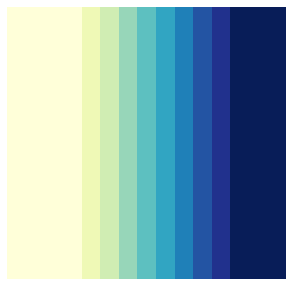

In [37]:
%%capture_png imgs/example.png
# linear_step fromfunction with transition
def linear_step_func(x,x0,x1):
    y= np.piecewise(x, [
        x < x0, 
       (x >= x0) & (x <= x1), 
        x > x1],
            [0.,
            lambda x: x/(x1-x0)+x0/(x0-x1), 
             1.]
       )
    return y
array=np.fromfunction(lambda i, j: linear_step_func(j,3,12), (15, 15))
disp(array,sep='.1f')

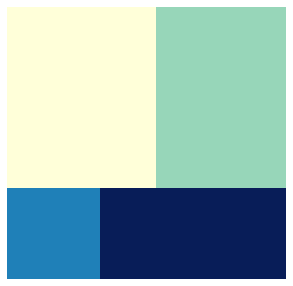

In [38]:
%%capture_png imgs/example.png
#from 4 regions
region0 = np.zeros( (10,8) )
region1 = np.ones( (10,7) )
region_top= np.concatenate( [region0,region1] , axis=1)

region2 = np.full( (5,5) , 2)
region3 = np.full( (5,10) ,3)
region_bottom = np.concatenate( [region2,region3] , axis=1)

array= np.concatenate( [region_top,region_bottom] ,axis=0)
disp(array)

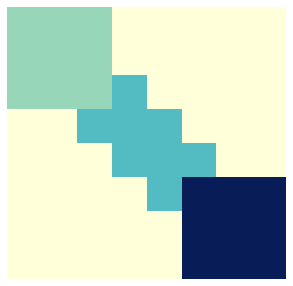

In [39]:
%%capture_png imgs/example.png
# prepare some coordinates
x, y = np.indices((8, 8))

cube1 = (x < 3) & (y < 3)
cube2 = (x >= 5) & (y >= 5)
link = np.sqrt(abs(x - y)) <= 1
array = np.zeros(x.shape)
array[link]=14
array[cube1]=10
array[cube2]=30
disp(array)

In [40]:
from pathlib import Path

base_directory = Path.cwd() /"temp_images"
include_text = "example"
suffix = ".png"

file_names = []
for subp in base_directory.rglob("*"): # using python assignment operator: x &= 3 equals x = x & 3
    cond = True
    cond &= include_text in subp.name
    cond &= (suffix == subp.suffix)
    if cond is True:
        file_names.append(subp)
file_names.sort()
len(file_names)

0

In [ ]:
# save here
file_name = "array_gallery"
base_directory = temp_path
target_directory = Path.cwd() / "imgs"
target_directory.mkdir(parents=True, exist_ok=True)

prefix = file_name # delete files that where created in the past 
for file in target_directory.rglob("*"):
    if (prefix in file.name):
        file.unlink() 

paths = sorted(Path(base_directory).iterdir(), key=os.path.getmtime)
dest_names = list(name_snippet_pairs.keys())
new_keys = []
for num, (p,des) in enumerate(zip(paths,dest_names)):
    to_path = target_directory /  f"{file_name}_{num:03}_{des}"   
    shutil.copy(p,  to_path)
    new_keys.append(to_path.name)
new_name_snippet_pairs ={} 
new_values = list(name_snippet_pairs.values())

for key, value in zip(new_keys,new_values):
    if value.startswith("\n"):
        value = value[1:]
    if value.endswith("\n"):
        value = value[:-1]
    value += "\n"
    new_name_snippet_pairs[key]=value
with open(f'imgs/{file_name}.json', 'w') as fp:
    json.dump(new_name_snippet_pairs, fp,indent=2)
display(new_name_snippet_pairs)
!rm -r $base_directory
!git add .

In [ ]:
# %%capture_png final_output.png
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import ImageGrid
# import numpy as np

# plt.rcParams['figure.dpi'] = 150
# fig = plt.figure(figsize=(15., 12.), facecolor= "#89CBEC")
# grid = ImageGrid(fig, 111,  
#                  nrows_ncols=(4, 5),  
#                  axes_pad=0.1, 
#                  )

# for ax, im in zip(grid, file_names):
#     im = plt.imread(im)
#     ax.axis("off")
#     ax.imshow(im)

# plt.show()

In [ ]:
#shutil.rmtree(temp_path) # remove images folder